# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_style('whitegrid')

In [2]:
data = np.array([[17, 11, 11], [17, 9, 8], [12, 13, 19]])
data

array([[17, 11, 11],
       [17,  9,  8],
       [12, 13, 19]])

In [3]:
np.cov(data, bias=1, rowvar=1)

array([[ 8.        , 11.33333333, -5.33333333],
       [11.33333333, 16.22222222, -8.55555556],
       [-5.33333333, -8.55555556,  9.55555556]])

In [4]:
a = data[0] - data[0].mean()
b = data[1] - data[1].mean()
c = data[2] - data[2].mean()
print(a, b, c)

[ 4. -2. -2.] [ 5.66666667 -2.33333333 -3.33333333] [-2.66666667 -1.66666667  4.33333333]


In [5]:
ab = (a * b).sum() / 3
ac = (a * c).sum() / 3
bc = (b * c).sum() / 3

cov = np.array([
    [np.var(data[0]), ab, ac],
    [ab, np.var(data[1]), bc],
    [ac, bc, np.var(data[2])]
               ])
print('covariance matrix:')
print(cov)

covariance matrix:
[[ 8.         11.33333333 -5.33333333]
 [11.33333333 16.22222222 -8.55555556]
 [-5.33333333 -8.55555556  9.55555556]]


In [6]:
# generalized variance
np.var(np.hstack(data))

13.11111111111111

# Q2

In [7]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70,
              76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130,
              140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

In [8]:
# (a)
mode = Counter(X)

print('Mean:', X.mean())
print('Median:', np.median(X))
print('Mode:', mode.most_common()[0])

Mean: 71.45
Median: 71.5
Mode: (74, 3)


In [9]:
# (b)
print('Variance of Y:', np.var(Y))

Variance of Y: 1369.2099999999998


/home/yura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


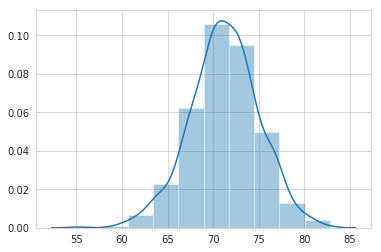

In [10]:
# (c)
x_normal = np.random.normal(X.mean(), X.std(), 1000)
sns.distplot(x_normal, bins=10)
#plt.hist(x_normal, bins=10)

In [11]:
# (d)
sort_x = sorted(x_normal)
count = 0

for i in range(len(sort_x)):
    
    if (80 <= sort_x[i]):
        count += 1

prob = count / len(sort_x)
print('Probability: ', prob)

Probability:  0.011


In [12]:
# (e)
mu = [X.mean(), Y.mean()]
print('2-D mean: ', mu)

2-D mean:  [71.45, 164.7]


In [13]:
data = np.vstack((X, Y))
data

array([[ 69,  74,  68,  70,  72,  67,  66,  70,  76,  68,  72,  79,  74,
         67,  66,  71,  74,  75,  75,  76],
       [153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185,
        112, 140, 150, 165, 185, 210, 220]])

In [14]:
print('covariance matrix:')
print(np.cov(data, rowvar=1, bias=0))

covariance matrix:
[[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


In [15]:
# (f)
print('r = ', np.corrcoef(X, Y, rowvar=True)[0, 1])

r =  0.8891701351748048


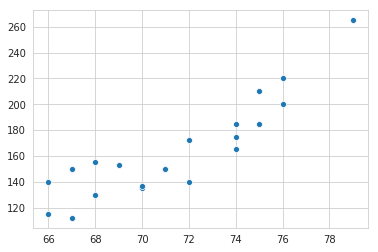

In [16]:
# (g)
sns.scatterplot(X, Y)

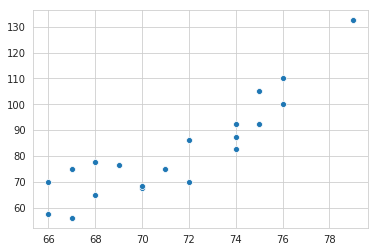

In [17]:
# (h)
from sklearn.linear_model import LinearRegression
sns.scatterplot(X, Y/2)

In [18]:
Y1 = Y/2

clf = LinearRegression()
clf.fit(X.reshape(-1, 1), Y1.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
coef = clf.coef_
intercept = clf.intercept_
score = clf.score(X.reshape(-1, 1), Y1.reshape(-1, 1))
print('weight = ', coef, '* age +', intercept)

weight =  [[4.42083409]] * age + [-233.51859541]
